# **[1] Importing Modules and Reading data**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
import warnings
from google.colab import drive
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
seed_constant = 42
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_classes_names = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train')
all_classes_names

['Ak', 'Nazli', 'Dimnit', 'Buzgulu', 'Ala_Idris']

In [ ]:
AK_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Ak'
Ala_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Ala_Idris'
buzgulu_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Buzgulu'
dimnit_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Dimnit'
nazli_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Nazli'



AK_files = os.listdir(AK_path)
Ala_files = os.listdir(Ala_path)
buzgulu_files = os.listdir(buzgulu_path)
dimnit_files = os.listdir(dimnit_path)
nazli_files = os.listdir(nazli_path)



print("length of AK:", len(AK_files))
print("length of Ala:", len(Ala_files))
print("length of buzhulu :", len(buzgulu_files))
print("length of dimnit:", len(dimnit_files))
print("length of nazli:", len(nazli_files))

length of AK: 70
length of Ala: 70
length of buzhulu : 70
length of dimnit: 70
length of nazli: 70


**Displaying a Sample of Data from Each Class**

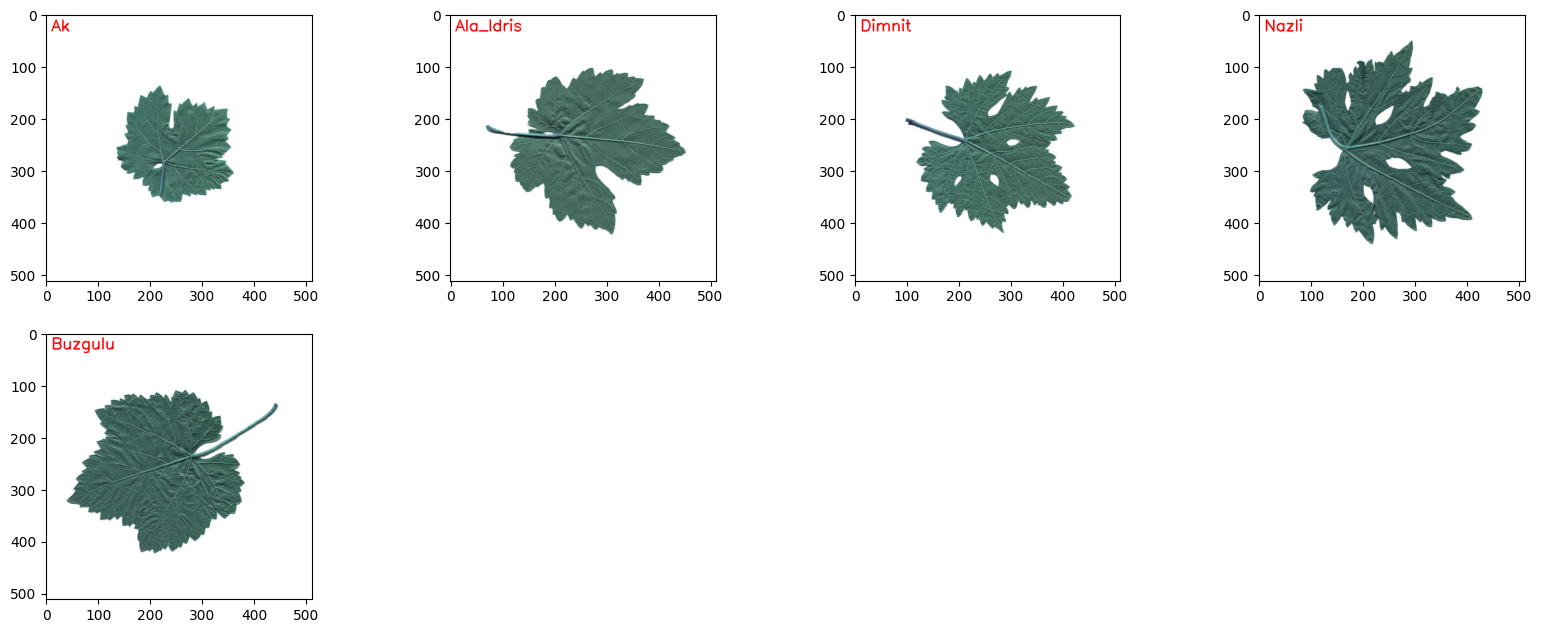

In [ ]:
plt.figure(figsize = (20,20))

random_range = random.sample(range(len(all_classes_names)), 5)

for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    image_files_names_list = os.listdir(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_image_file_name = random.choice(image_files_names_list)

    img = cv2.imread(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/{selected_class_Name}/{selected_image_file_name}')

    # white_pixels = (img[:, :, 0] > 250) & (img[:, :, 1] > 250) & (img[:, :, 2] > 250)
    # img[white_pixels] = 0

    cv2.putText(img, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the image.
    plt.subplot(5, 4, counter);plt.imshow(img);plt.axis('on')

In [ ]:
IMAGE_HEIGHT , IMAGE_WIDTH = 480,480

DATASET_DIR = "/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train"

CLASSES_LIST = ['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli']

In [ ]:
generator1=ImageDataGenerator(zoom_range=[0.6, 0.7])
generator2=ImageDataGenerator(zoom_range=[0.9, 1.0])

def create_dataset(class_name,class_index):
    '''
    This function will extract the data of the selected classes and create the
    required dataset.
    Returns:
        features:          A list containing the extracted images.
        labels:            A list containing the indexes of the classes associated with the images.
    '''

    features = []
    labels = []


    files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
    i=0
    for file_name in files_list:

      img = os.path.join(DATASET_DIR, class_name, file_name)
      img=cv2.imread(img)

      white_pixels = (img[:, :, 0] > 250) & (img[:, :, 1] > 250) & (img[:, :, 2] > 250)
      percentage=np.sum(white_pixels)/(img.shape[0]*img.shape[1])*100
      # img[white_pixels] = 0

      if percentage >= 80:
         img=generator1.random_transform(img)
      else:
         img=generator2.random_transform(img)




      img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))

      img = img/255.0

      features.append(img)

      labels.append(class_index)
      i+=1
    print(f"Number of data in class {class_name} = ",i)

    features = np.array(features)
    labels = np.array(labels)

    return features, labels

### **Create Dataset for Each Class**

In [ ]:
features_Ak, labels__Ak = create_dataset('Ak',0)
features_Ala_Idris, labels_Ala_Idris = create_dataset('Ala_Idris',1)
features_Buzgulu, labels_Buzgulu = create_dataset('Buzgulu',2)
features_Dimnit, labels_Dimnit = create_dataset('Dimnit',3)
features_Nazli, labels_Nazli = create_dataset('Nazli',4)

Number of data in class Ak =  70
Number of data in class Ala_Idris =  70
Number of data in class Buzgulu =  70
Number of data in class Dimnit =  70
Number of data in class Nazli =  70


In [ ]:
features_Ak.shape,labels__Ak.shape

((70, 480, 480, 3), (70,))

In [ ]:
features_Ala_Idris.shape,labels_Ala_Idris.shape

((70, 480, 480, 3), (70,))

In [ ]:
features_Buzgulu.shape,labels_Buzgulu.shape

((70, 480, 480, 3), (70,))

In [ ]:
features_Dimnit.shape,labels_Dimnit.shape

((70, 480, 480, 3), (70,))

In [ ]:
features_Nazli.shape,labels_Nazli.shape

((70, 480, 480, 3), (70,))

### **Displaying data after Create and apply preprocessing**


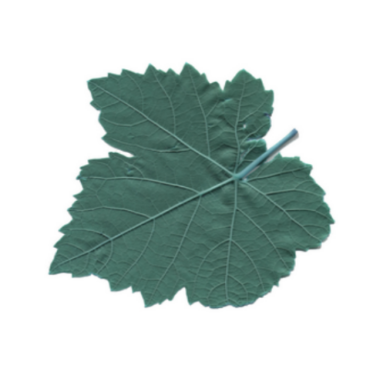

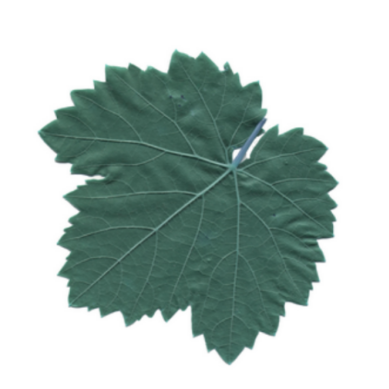

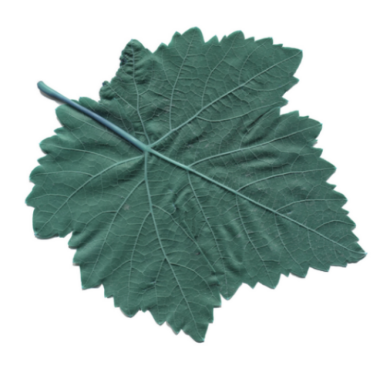

In [ ]:
for i in range(3):

  plt.imshow(features_Ak[i,:,:,:])
  plt.axis('off')
  plt.show()

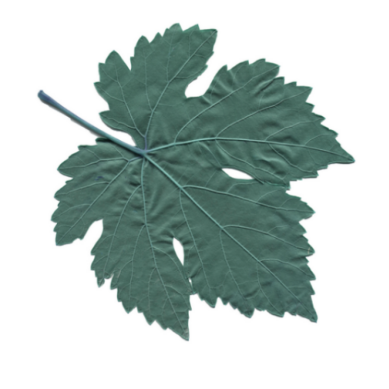

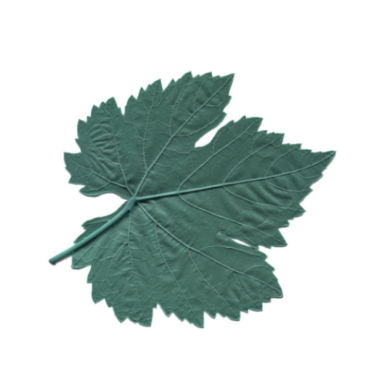

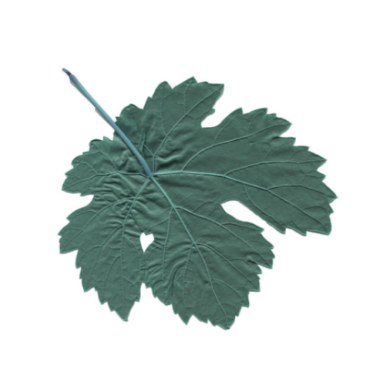

In [ ]:
for i in range(3):

  plt.imshow(features_Ala_Idris[i,:,:,:])
  plt.axis('off')
  plt.show()

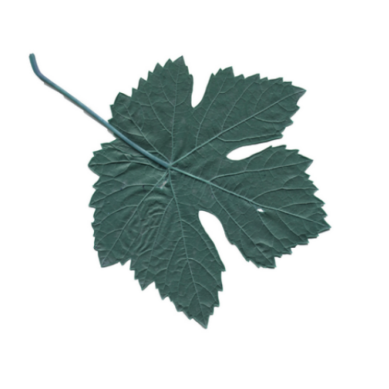

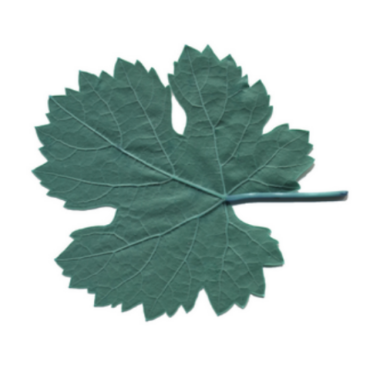

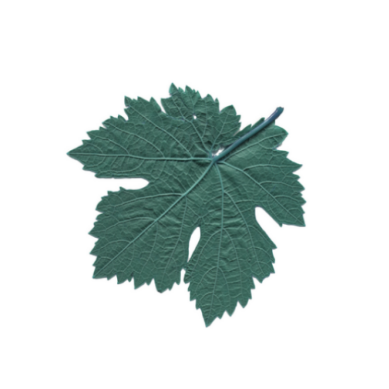

In [ ]:
for i in range(3):

  plt.imshow(features_Buzgulu[i,:,:,:])
  plt.axis('off')
  plt.show()

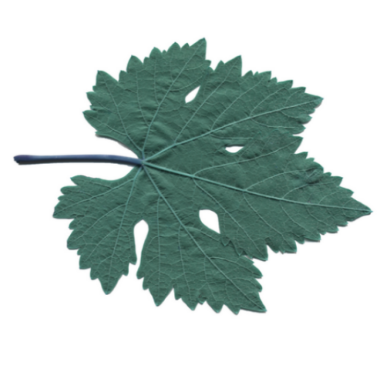

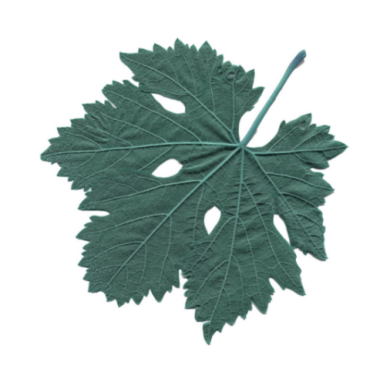

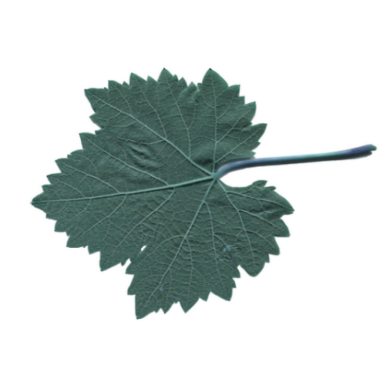

In [ ]:
for i in range(3):

  plt.imshow(features_Dimnit[i,:,:,:])
  plt.axis('off')
  plt.show()

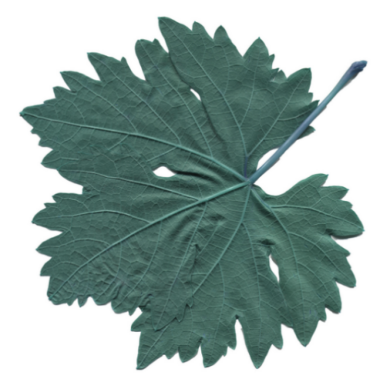

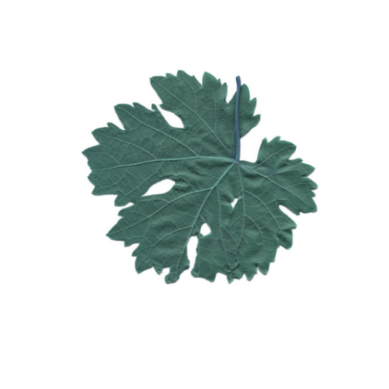

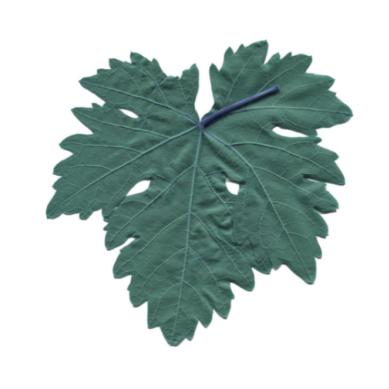

In [ ]:
for i in range(3):

  plt.imshow(features_Nazli[i,:,:,:])
  plt.axis('off')
  plt.show()

### **Perform Data Augmentation for Each Class**

In [ ]:
generator=ImageDataGenerator(
    rotation_range=130,
    horizontal_flip=True,
    vertical_flip=True)


Apply augmentation by randomly selecting between rotation and horizontal or vertical flipping.

In [ ]:
for img in features_Ak:
  augmented_img = generator.random_transform(img)
  features_Ak=np.append(features_Ak,augmented_img)

features_Ak = np.reshape(features_Ak, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels__Ak=np.append(labels__Ak,labels__Ak)

In [ ]:
for img in features_Ala_Idris:
  augmented_img = generator.random_transform(img)
  features_Ala_Idris=np.append(features_Ala_Idris,augmented_img)

features_Ala_Idris = np.reshape(features_Ala_Idris, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels_Ala_Idris=np.append(labels_Ala_Idris,labels_Ala_Idris)

In [ ]:
for img in features_Buzgulu:
  augmented_img = generator.random_transform(img)
  features_Buzgulu=np.append(features_Buzgulu,augmented_img)

features_Buzgulu = np.reshape(features_Buzgulu, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels_Buzgulu=np.append(labels_Buzgulu,labels_Buzgulu)

In [ ]:
for img in features_Dimnit:
  augmented_img = generator.random_transform(img)
  features_Dimnit=np.append(features_Dimnit,augmented_img)

features_Dimnit = np.reshape(features_Dimnit, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels_Dimnit=np.append(labels_Dimnit,labels_Dimnit)

In [ ]:
for img in features_Nazli:
  augmented_img = generator.random_transform(img)
  features_Nazli=np.append(features_Nazli,augmented_img)

features_Nazli = np.reshape(features_Nazli, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels_Nazli=np.append(labels_Nazli,labels_Nazli)

After Augmenting, every class has 140 samples

In [ ]:
features_Ak.shape,labels__Ak.shape

In [ ]:
features_Ala_Idris.shape,labels_Ala_Idris.shape

In [ ]:
features_Buzgulu.shape,labels_Buzgulu.shape

In [ ]:
features_Dimnit.shape,labels_Dimnit.shape

In [ ]:
features_Nazli.shape,labels_Nazli.shape

### **Splitting Data into Training, and Testing Sets**

Concatenate features into one variable and labels as well.


In [ ]:
X_train=np.concatenate((features_Ak,features_Ala_Idris,features_Buzgulu,features_Dimnit,features_Nazli),axis=0)
y_train=np.concatenate((labels__Ak,labels_Ala_Idris,labels_Buzgulu,labels_Dimnit,labels_Nazli),axis=0)

In [ ]:
del features_Ak
del features_Ala_Idris
del features_Buzgulu
del features_Dimnit
del features_Nazli


del labels__Ak
del labels_Ala_Idris
del labels_Buzgulu
del labels_Dimnit
del labels_Nazli

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42,shuffle=True,stratify=y_train)

The total number of training samples is 595, and the test set contains 105 samples.


In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

In [ ]:
from keras.layers import BatchNormalization, Activation
from keras.regularizers import l2


### **Xception**

In [ ]:
# -*- coding: utf-8 -*-
"""Inception V3 model for Keras.

Note that the input image format for this model is different than for
the VGG16 and ResNet models (299x299 instead of 224x224),
and that the input preprocessing function is also different (same as Xception).

# Reference

- [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567)

"""
from __future__ import print_function
from __future__ import absolute_import

import warnings
import numpy as np

from keras.models import Model
from keras import layers
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.utils import get_source_inputs
# from tensorflow.keras.utils.layer_utils import convert_all_kernels_in_model
from tensorflow.keras.utils import get_file
from keras import backend as K
from keras.preprocessing import image


TF_WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels.h5'
TF_WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'


def Xception(include_top=True, weights='imagenet',
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=1000):
    """Instantiates the Xception architecture.

    Optionally loads weights pre-trained
    on ImageNet. This model is available for TensorFlow only,
    and can only be used with inputs following the TensorFlow
    data format `(width, height, channels)`.
    You should set `image_data_format="channels_last"` in your Keras config
    located at ~/.keras/keras.json.

    Note that the default input image size for this model is 299x299.

    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(299, 299, 3)`.
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 71.
            E.g. `(150, 150, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.

    # Returns
        A Keras model instance.

    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
        RuntimeError: If attempting to run this model with a
            backend that does not support separable convolutions.
    """
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')

    if K.backend() != 'tensorflow':
        raise RuntimeError('The Xception model is only available with '
                           'the TensorFlow backend.')
    if K.image_data_format() != 'channels_last':
        warnings.warn('The Xception model is only available for the '
                      'input data format "channels_last" '
                      '(width, height, channels). '
                      'However your settings specify the default '
                      'data format "channels_first" (channels, width, height). '
                      'You should set `image_data_format="channels_last"` in your Keras '
                      'config located at ~/.keras/keras.json. '
                      'The model being returned right now will expect inputs '
                      'to follow the "channels_last" data format.')
        K.set_image_data_format('channels_last')
        old_data_format = 'channels_first'
    else:
        old_data_format = None

    # Determine proper input shape
    # input_shape = _obtain_input_shape(input_shape,
    #                                   default_size=299,
    #                                   min_size=71,
    #                                   data_format=K.image_data_format(),
    #                                   include_top=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False, name='block1_conv1')(img_input)
    x = BatchNormalization(name='block1_conv1_bn')(x)
    x = Activation('relu', name='block1_conv1_act')(x)
    x = Conv2D(64, (3, 3), use_bias=False, name='block1_conv2')(x)
    x = BatchNormalization(name='block1_conv2_bn')(x)
    x = Activation('relu', name='block1_conv2_act')(x)

    residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv1')(x)
    x = BatchNormalization(name='block2_sepconv1_bn')(x)
    x = Activation('relu', name='block2_sepconv2_act')(x)
    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv2')(x)
    x = BatchNormalization(name='block2_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block2_pool')(x)
    x = layers.add([x, residual])

    residual = Conv2D(256, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block3_sepconv1_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv1')(x)
    x = BatchNormalization(name='block3_sepconv1_bn')(x)
    x = Activation('relu', name='block3_sepconv2_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv2')(x)
    x = BatchNormalization(name='block3_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block3_pool')(x)
    x = layers.add([x, residual])

    residual = Conv2D(728, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block4_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv1')(x)
    x = BatchNormalization(name='block4_sepconv1_bn')(x)
    x = Activation('relu', name='block4_sepconv2_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv2')(x)
    x = BatchNormalization(name='block4_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block4_pool')(x)
    x = layers.add([x, residual])

    for i in range(8):
        residual = x
        prefix = 'block' + str(i + 5)

        x = Activation('relu', name=prefix + '_sepconv1_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv1')(x)
        x = BatchNormalization(name=prefix + '_sepconv1_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv2_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv2')(x)
        x = BatchNormalization(name=prefix + '_sepconv2_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv3_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv3')(x)
        x = BatchNormalization(name=prefix + '_sepconv3_bn')(x)

        x = layers.add([x, residual])

    residual = Conv2D(1024, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block13_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block13_sepconv1')(x)
    x = BatchNormalization(name='block13_sepconv1_bn')(x)
    x = Activation('relu', name='block13_sepconv2_act')(x)
    x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False, name='block13_sepconv2')(x)
    x = BatchNormalization(name='block13_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block13_pool')(x)
    x = layers.add([x, residual])

    x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False, name='block14_sepconv1')(x)
    x = BatchNormalization(name='block14_sepconv1_bn')(x)
    x = Activation('relu', name='block14_sepconv1_act')(x)

    x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False, name='block14_sepconv2')(x)
    x = BatchNormalization(name='block14_sepconv2_bn')(x)
    x = Activation('relu', name='block14_sepconv2_act')(x)

    if include_top:
        x = GlobalAveragePooling2D(name='avg_pool')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='xception')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('xception_weights_tf_dim_ordering_tf_kernels.h5',
                                    TF_WEIGHTS_PATH,
                                    cache_subdir='models')
        else:
            weights_path = get_file('xception_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    TF_WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models')
        model.load_weights(weights_path)

    if old_data_format:
        K.set_image_data_format(old_data_format)
    return model



base_model = Xception(include_top=False, weights='imagenet',input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),pooling='avg')

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False



x=base_model.output
x=Flatten()(x)

x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(264,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.3)(x)

main_output=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=[main_output])

# for layer in base_model.layers:
#     layer.trainable = False


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
               metrics=['accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.TruePositives(name='true_positives'),
        tf.keras.metrics.TrueNegatives(name='true_negatives')])

model.summary()

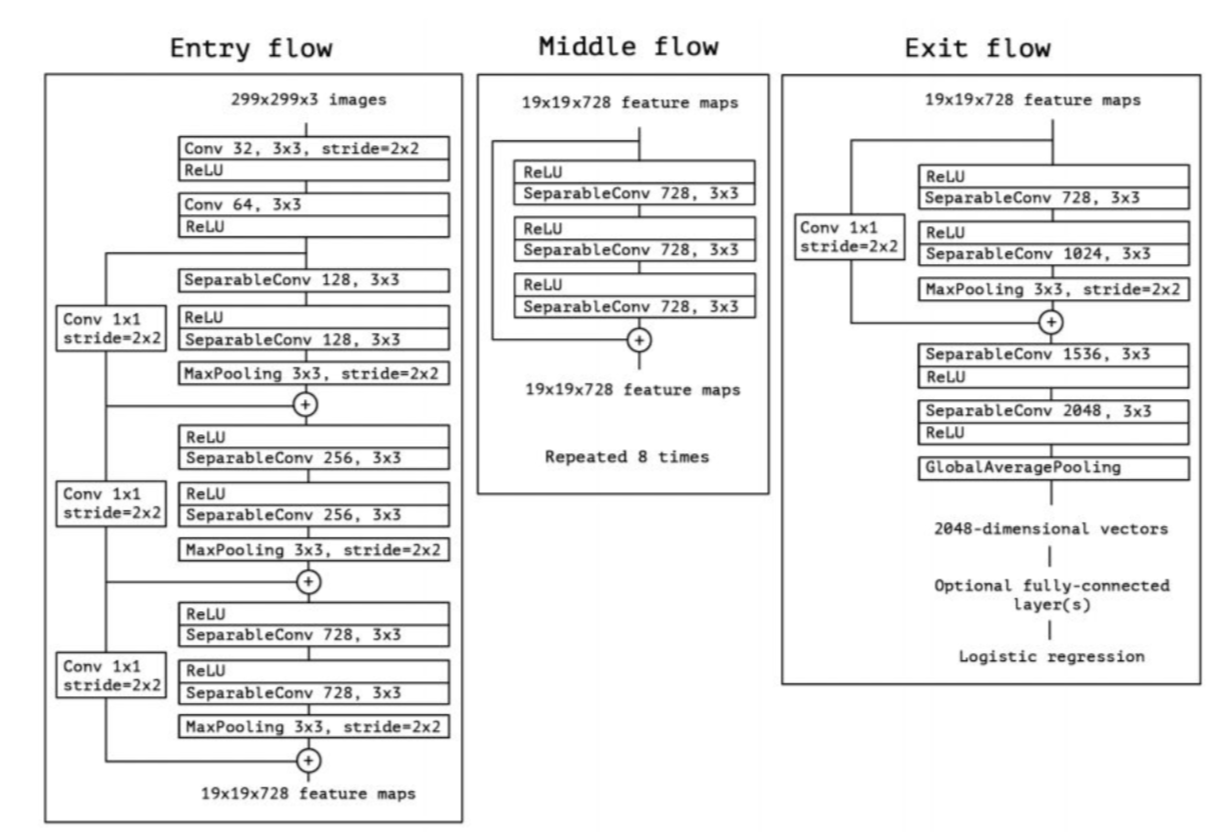

a brief overview of the architecture:

1. **Entry Flow**: The input image is first passed through a series of convolutional
layers with batch normalization and activation functions like ReLU. These layers extract low-level features from the input image.

2. **Middle Flow**: After the initial convolutional layers, the network applies a series of depth-wise separable convolutional layers. These layers help in capturing more abstract features by performing spatial convolutions followed by pointwise convolutions.

3. **Exit Flow**: The last stage of the Xception architecture consists of a few more depth-wise separable convolutional layers. It gradually reduces the spatial dimensions of the feature maps while increasing the number of channels.

Integrate three connected layers after the Xception model while ensuring the model remains non-trainable. The first fully connected layer comprises 1024 neurons, utilizing the ReLU activation function, and integrating a dropout of 0.2 to prevent overfitting. The second layer consists of 512 neurons with ReLU activation and a dropout rate of 0.2. The third layer contains 256 neurons with a dropout of 0.2. Finally, employ the softmax activation function in the output layer for multiclass classification.

In [ ]:
plot_model(model, to_file = 'Xnception_4Layers.png', show_shapes = True, show_layer_names = True)

In [ ]:
history=model.fit(
    X_train,y_train,
    epochs=15,
    validation_data=(X_val, y_val),
    batch_size = 32
)

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

In [ ]:
model.save('xnception_5layers.h5')

### **Get test data from drive**

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Test"

In [ ]:
plt.figure(figsize = (20,20))

random_range = random.sample(range(len(all_classes_names)), 5)

for counter, random_index in enumerate(random_range, 1):


    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    image_files_names_list = os.listdir(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Test/')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_image_file_name = random.choice(image_files_names_list)

    img = cv2.imread(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Test/{selected_image_file_name}')



    # Display the image.
    plt.subplot(5, 4, counter);plt.imshow(img);plt.axis('on')

In [ ]:
generator1=ImageDataGenerator(zoom_range=[0.6, 0.7])
generator2=ImageDataGenerator(zoom_range=[0.9, 1.0])

def create_testset():
    '''
    This function will extract the data of the selected classes and create the
    required dataset.
    Returns:
        features:          A list containing the extracted images.
        labels:            A list containing the indexes of the classes associated with the images.
    '''

    features = []


    files_list = os.listdir(DATASET_DIR)
    i=0
    for file_name in files_list:

      img = os.path.join(DATASET_DIR,file_name)
      img=cv2.imread(img)

      white_pixels = (img[:, :, 0] > 250) & (img[:, :, 1] > 250) & (img[:, :, 2] > 250)
      percentage=np.sum(white_pixels)/(img.shape[0]*img.shape[1])*100
      # img[white_pixels]=0
      if percentage >= 80:
         img=generator1.random_transform(img)
      else:
         img=generator2.random_transform(img)




      img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))

      img = img/255.0

      features.append(img)

      i+=1
    print(f"Number of test data = ",i)

    features = np.array(features)

    return features

In [ ]:
test_data=create_testset()

In [ ]:
test_data.shape

In [ ]:
for i in range(3):

  plt.imshow(test_data[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
predicted_classes

**Save the output in a CSV file by removing the extension of the image filenames**


In [ ]:
filenames_without_extension = [filename.replace(".png", "") for filename in os.listdir(DATASET_DIR)]

pred={
    'ID':filenames_without_extension,
    'label':predicted_classes
}

submit=pd.DataFrame(pred)
submit.head()

In [ ]:
submit.tail()

In [ ]:
submit.to_csv('Xception_5layer.csv',index=False)